# <center> BSE Test </center>
<center> CM </center>

# Initial Setup 

In [2]:
# Initial Setup:

import matplotlib.pyplot as plt
import numpy as np
import csv
import math
import random

from BSE import market_session

# The next are helper functions that you will use later, if they don't make 
# much sense now, don't worry too much about it they will become clearer later:

# Use this to plot trades of a single experiment
def plot_trades(trial_id):
    prices_fname = trial_id + '_transactions.csv'
    x = np.empty(0)
    y = np.empty(0)
    with open(prices_fname, newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            time = float(row[1])
            price = float(row[2])
            x = np.append(x,time)
            y = np.append(y,price)

    plt.plot(x, y, 'x', color='black') 
    
# Use this to run an experiment n times and plot all trades
def n_runs_plot(n, trial_id, start_time, end_time, traders_spec, order_sched):
    x = np.empty(0)
    y = np.empty(0)

    for i in range(n):
        trialId = trial_id + '_' + str(i)
        tdump = open(trialId + '_avg_balance.csv','w')

        market_session(trialId, start_time, end_time, traders_spec, order_sched, tdump, True, False)
        
        tdump.close()

        with open(trialId + '_transactions.csv', newline='') as csvfile:
            reader = csv.reader(csvfile)
            for row in reader:
                time = float(row[1])
                price = float(row[2])
                x = np.append(x,time)
                y = np.append(y,price)

    plt.plot(x, y, 'x', color='black');

# !!! Don't use on it's own   
def getorderprice(i, sched, n, mode):
    pmin = min(sched[0][0], sched[0][1])
    pmax = max(sched[0][0], sched[0][1])
    prange = pmax - pmin
    stepsize = prange / (n - 1)
    halfstep = round(stepsize / 2.0)

    if mode == 'fixed':
        orderprice = pmin + int(i * stepsize)
    elif mode == 'jittered':
        orderprice = pmin + int(i * stepsize) + random.randint(-halfstep, halfstep)
    elif mode == 'random':
        if len(sched) > 1:
            # more than one schedule: choose one equiprobably
            s = random.randint(0, len(sched) - 1)
            pmin = min(sched[s][0], sched[s][1])
            pmax = max(sched[s][0], sched[s][1])
        orderprice = random.randint(pmin, pmax)
    return orderprice    

# !!! Don't use on it's own
def make_supply_demand_plot(bids, asks):
    # total volume up to current order
    volS = 0
    volB = 0

    fig, ax = plt.subplots()
    plt.ylabel('Price')
    plt.xlabel('Quantity')
    
    pr = 0
    for b in bids:
        if pr != 0:
            # vertical line
            ax.plot([volB,volB], [pr,b], 'r-')
        # horizontal lines
        line, = ax.plot([volB,volB+1], [b,b], 'r-')
        volB += 1
        pr = b
    if bids:
        line.set_label('Demand')
        
    pr = 0
    for s in asks:
        if pr != 0:
            # vertical line
            ax.plot([volS,volS], [pr,s], 'b-')
        # horizontal lines
        line, = ax.plot([volS,volS+1], [s,s], 'b-')
        volS += 1
        pr = s
    if asks:
        line.set_label('Supply')
        
    if bids or asks:
        plt.legend()
    plt.show()

# Use this to plot supply and demand curves from supply and demand ranges and stepmode
def sup_dem(seller_num, sup_ranges, buyer_num, dem_ranges, stepmode):
    asks = []
    for s in range(seller_num):
        asks.append(getorderprice(s, sup_ranges, seller_num, stepmode))
    asks.sort()
    bids = []
    for b in range(buyer_num):
        bids.append(getorderprice(b, dem_ranges, buyer_num, stepmode))
    bids.sort()
    bids.reverse()
    
    make_supply_demand_plot(bids, asks) 

# plot sorted trades, useful is some situations - won't be used in this worksheet
def in_order_plot(trial_id):
    prices_fname = trial_id + '_transactions.csv'
    y = np.empty(0)
    with open(prices_fname, newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            price = float(row[2])
            y = np.append(y,price)
    y = np.sort(y)
    x = list(range(len(y)))

    plt.plot(x, y, 'x', color='black')   

# Static Markets

Currently in BSE 7 trader types are defined, namely "ZIP", "ZIC", "SHVR", "GVWY", "SNPR", "PRZI" and "PRSH"

In [3]:
buyers_spec = [('GVWY',10),('SHVR',10),('ZIC',10),('ZIP',10)]
sellers_spec = buyers_spec
traders_spec = {'sellers':sellers_spec, 'buyers':buyers_spec}
traders_spec

{'sellers': [('GVWY', 10), ('SHVR', 10), ('ZIC', 10), ('ZIP', 10)],
 'buyers': [('GVWY', 10), ('SHVR', 10), ('ZIC', 10), ('ZIP', 10)]}

### Supply and Demand Curves

#### Supply and Demand Ranges and Schedules 

In [5]:
sup_range = (50,150)
dem_range = (50,150)

start_time = 0
end_time = 600
supply_schedule = [{"from": start_time,"to": end_time,"ranges": [sup_range],"stepmode": "fixed"}]
demand_schedule = [{"from": start_time,"to": end_time,"ranges": [dem_range],"stepmode": "fixed"}]

You can use the provided "sup_dem" function to print the supply and demand curves of experiments.

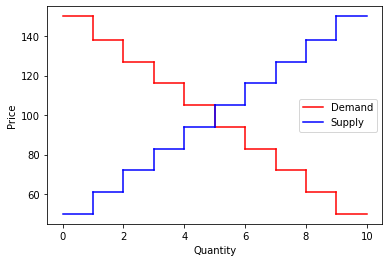

In [6]:
sup_dem(10, [sup_range], 10, [dem_range], 'fixed')

### Order Schedule 

In [7]:
order_interval = 60
timemode = "periodic"
order_sched = {"sup": supply_schedule,"dem": demand_schedule, "interval": order_interval, "timemode": timemode}

### Market Session

In [8]:
trial_id = 'test_1'
tdump = open('test_1_avg_balance.csv','w')
dump_all = True
verbose = False

market_session(trial_id, start_time, end_time, traders_spec, order_sched, tdump, dump_all, verbose)

tdump.close()

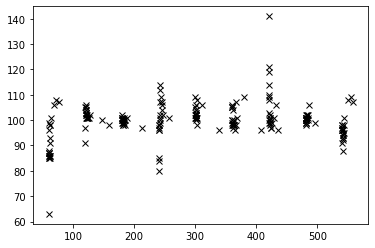

In [10]:
plot_trades('test_1')

### Static Market Sessions

In [1]:
# Traders specs

buyers_spec = [('ZIP',10)]
buyers_spec = [('GVWY',10),('SHVR',10),('ZIC',10),('ZIP',10)]
sellers_spec = buyers_spec
traders_spec = {'sellers':sellers_spec, 'buyers':buyers_spec}


# Supply and demand 

sup_range = (50,150)
dem_range = (50,150)

start_time = 0
end_time = 180
supply_schedule = [{"from": start_time,"to": end_time,"ranges": [sup_range],"stepmode": "fixed"}]
demand_schedule = [{"from": start_time,"to": end_time,"ranges": [dem_range],"stepmode": "fixed"}]

sup_dem(10, [sup_range], 10, [dem_range], 'fixed')

# Order schedule 

order_schedule = {"sup": supply_schedule,"dem": demand_schedule, "interval": 10, "timemode": "periodic"}

NameError: name 'sup_dem' is not defined

You can also use the provided "n_runs_plot" function to run the same experiment multiple times and plot its graph. Plot the graph of 10 runs of the previous experiment:

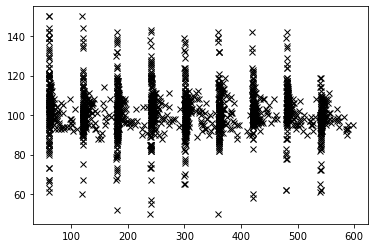

In [11]:
n_runs_plot(10, trial_id, start_time, end_time, traders_spec, order_sched)

2) A market that runs for 5 minutes and is populated with 3 buyers of every type except ZIC and 3 sellers of every type except SNPR. The supply curve should have a minimum value at 100 and a maximum value at 200 and demand curve should have a minimum value at 50, maximum value at 150. There shouldn't be any pattern in the step size. Traders should be resupplied with new orders continuously at fixed intervals with some noise and a re-supply cycle of 30 seconds. Plot the supply and demand curves along with your results.

### Advanced Static Markets 

The previous section cover everything you need to set up most static markets. In this section, we will see a method that creates a static market that is a little more complex. 

If you remember when we defined [supply and demand schedules](#Supply-and-Demand-Schedules), we said that the schedule dictionary has key "ranges" which is a list of tuples but we only looked at the case where we provided only one range tuple.

If the stepmode is set to random, we can actually provide multiple ranges (in all other stepmodes, BSE will ignore all ranges except from the first). What this does, is that instead of having just one supply or demand range, we have multiple and one is chosen at random every time an order is issued to a trader.

Try this feature out by using the previous market configuration but with supply and demand ranges 1-50, 100-200 and 300-350. Plot the supply and demand curves along with your results:

## Dynamic Markets

So far, we've looked at experiments that use the same supply and demand curves for the entire duration of the experiment (what we called static markets). In this section, we will see markets with variable supply and demand curves. BSE gives us 2 ways to dynamically change the supply and demand curves during an experiment.

### Market "Shocks"

The first way we will look at is something called a market "shock". What this means is that at specified points in the experiment we suddenly switch to different supply and/or demand schedules.

As we saw when we defined [supply and demand schedules](#Supply-and-Demand-Schedules), each schedule is a list of dictionaries. In static markets, we used one dictionary to define a schedule for the entire duration of the market session. In order to introduce one "shock" to the market, we provide two dictionaries with different configurations. Care must be taken to make sure that the combination of the intervals of the two (or more) schedules covers the entire duration of the market session. For example if we have a market that runs for 100 seconds, we could have the first schedule start at 0 ('from' = 0) and finish at 70 seconds ('to' = 70) and then have the second schedule start at 70 ('from' = 70) and finish at 100 ('to' = 100).

Let's try this using a market that runs for 10 minutes and is populated with 10 ZIP buyers and 10 ZIP sellers. The supply and demand curves should have steps with regular intervals, and initially minimum value at 50, and maximum value at 100. Then in the middle of the experiment, we introduce a "shock" where the minimum value of the supply and demand curves changes to 150 and maximum to 200. All traders should be resupplied with a new order at the same time every 15 seconds. Plotting the results should make the "shock" obvious.

Of course, we are not confined to having just one "shock" in the market. BSE allows us to have as many as we want. Let's try this by having the same experiment as before but this time the supply and demand curves move from (50, 100) to (150, 200) at 3 minutes and then back to (50, 100) at 7 minutes. Again plot all trades to see the effect of the 2 shocks. 

### Offset Function

The second way we can dynamically alter markets in BSE is by using offset functions. An offset function, is a function that can continuously alter the minimum and maximum values of the supply and demand curves while the experiment is running. How this works, it that the offset function is a function of time that returns a number that is added to the minimum and maximum values defined in the supply and/or demand ranges. With the current version of BSE you can find one offset function already build-in (function "schedule_offsetfn" shown below - a sine wave that grows in amplitude, and reduces its wavelength, as time progresses).

In [12]:
# schedule_offsetfn returns time-dependent offset, to be added to schedule prices
def schedule_offsetfn(t):
    pi2 = math.pi * 2
    c = math.pi * 3000
    wavelength = t / c
    gradient = 100 * t / (c / pi2)
    amplitude = 100 * t / (c / pi2)
    offset = gradient + amplitude * math.sin(wavelength * t)
    return int(round(offset, 0))

We can also create our own offset function in a similar way by creating a new function that takes as input time and returns a number. For example, "offset_1" and "offset_2" are two silly non-dynamic offset functions that always return constant offset of 1 or 2:

In [13]:
def offset_1(t):
    return 1

def offset_2(t):
    return 2

Define your own offset function that returns an offset that is initially equal to zero and increases by 1 every second:

In [14]:
def offset_t(t):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-14-8f267578923d>, line 2)

To apply an offset function, we need to alter the supply and/or demand ranges. In section [supply and demand ranges](#Supply-and-Demand-Ranges) we saw how to create supply and demand ranges but we only use tuples with two numbers - the minimum and the maximum. Along with the two numbers we can provide a third item in the tuple, an offset function which will be used on both the minimum and maximum values in the range. If we want to use a different offset function for the minimum and a different one for the maximum value in a range we can also do that by providing a tuple with four items in it, the minimum value, the maximum value, the offset function that will be applied to the minimum value and the offset function to be applied to the maximum value.

For example, the following creates two ranges each with a different offset applied to both the minimum and maximum value: 

In [ ]:
range_offset1 = (50, 100, schedule_offsetfn)
range_offset2 = (150, 200, offset_t)

Similarly, the following creates a range with two offset functions the first one applied to the minimum and the second one to the maximum:

In [ ]:
range_offset_both = (50, 100, offset_1, offset_2)

Run a market session using the previous market configuration but this time replace range1 with range_offset1 and range2 with range_offset2. Plot the results:

## Market Configuration Summary

In the previous sections, we explored all experiment configuration options available in BSE. We first saw static markets and then dynamic. For more information check the __[BSE wiki](https://github.com/davecliff/BristolStockExchange/wiki/4.-Altering-the-market-supply-and-demand)__.  

# Code Exploration

The current version of BSE has more than 2000 lines of code so it is easy to get lost, so in this section we will see how the most important parts of BSE work.

Starting with the Exchange class this is the backbone of BSE. It inherits from the Orderbook class (which itself inherits from the Orderbook_half class). We won't go into too much detail on how the exchange works as traders don't actually interact with it directly. The important thing to understand is that the exchange maintains a LOB, is able to process orders, and it keeps a list of transactions (the tape). You don't need to understand much more to work with BSE, but if you want to learn more, the most important method is "process_order2" and I suggest that you start from there.

When we want to run an experiment with BSE, we configure the experiment (as we saw in detail in the previous sections) and then call the "market_session" function. This function is responsible for all the functionality of BSE. How it roughly works, is: 

- It first populates the market with traders (using the "populate_market" function) by instantiating them from their respective classes and gives each a unique id.
- Then loops around until the end of the experiment. The time of the market is increased by a timestep on every iteration. One timestep is not one (market) second but is equal to a fraction of a second. The exact fraction is determined by the number of traders (e.g. for a market with 5 sellers and 5 buyers, the timestep is 1/10 of a second).
- On every iteration:
    - A call to the "customer_orders" is made. This function does one of two things. It initially creates limit orders for all traders that will be given to them in the future (remember traders are resupplied with orders based on a schedule with an interval). If it already created the orders, on future calls it checks which of those orders should be issued (based on the current time) to the traders and sends them by calling the "add_order" method of that trader.
    - A trader is selected at random and the trader's "getorder" method is called thus allowing that trader to trade. What this means, is that the selected trader can issue a new order (which adjusts its current order if the trade has one) or can do nothing if the trader is happy with its current order (or lack of order). (Note: This trader order is different from the one given to the trader by "customer_orders". This one is the order the trader issues to the market while the other is the trader's private value) 
    - If the selected trader issued a new order:
        - That order is processed by the exchange using the "process_order2" method. This method either returns a "transaction_record" indicating that the order was executed and resulted in a trade or None indicating that the order was not executed (i.e. just added to the LOB). The transaction record contains all information of a trade (time, price, involved parties etc). If the order resulted to a trade, the two traders involved are also notified using their "bookkeep" methods.
        - After the order is processed, all traders are notified with the new state of the LOB (and the trade if it happened). This allows traders to adjust their strategy given the new state of the LOB.
- Finally at the end of the session the function produces the appropriate output files.